In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
import seaborn as sns
from math import exp
import handcalcs.render

In [2]:
data = pd.DataFrame({'Patient Height': [180,185,188,190,160,155,150,154],
                    'Patient Weights':[205,198,210,200, 156,133,145,135,],
                     'Heart Disease':[1,1,1,1,0,0,0,0]
                    })
data

,Patient Height,Patient Weights,Heart Disease
0,180,205,1
1,185,198,1
2,188,210,1
3,190,200,1
4,160,156,0
5,155,133,0
6,150,145,0
7,154,135,0


In [3]:
X, y = data[['Patient Height', 'Patient Weights']], data['Heart Disease']

clf = SVC(kernel='linear')
clf.fit(X, y)


SVC(kernel='linear')

c:\users\tomzz\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


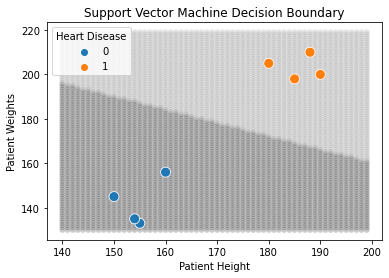

In [4]:
xx1, xx2 = np.meshgrid(np.arange(140, 200, 1), np.arange(130, 220, 1))
XX = np.vstack((xx1.ravel(), xx2.ravel())).T

yy = clf.predict(XX)

sns.scatterplot(x=XX[:,0], y=XX[:,1], hue=yy, palette = "gist_gray",  alpha = 0.3,sizes=[5,5],legend=False)
sns.scatterplot(data['Patient Height'], data['Patient Weights'], hue = data['Heart Disease'],  s = 100)

plt.title('Support Vector Machine Decision Boundary')
plt.show()

In [5]:
data = pd.DataFrame({
                    'Patient Dosage':[1,1.1,1.5, 10,10.5,10.25, 20,19.5,20.1],
                     'Heart Disease':[0,0,0,1,1,1,0,0,0]
                    })
data

,Patient Dosage,Heart Disease
0,1.00,0
1,1.10,0
2,1.50,0
3,10.00,1
4,10.50,1
5,10.25,1
6,20.00,0
7,19.50,0
8,20.10,0


In [6]:
X, y = data[['Patient Dosage']], data['Heart Disease']

clf = SVC(kernel='poly', degree=2, coef0 =  1)
clf.fit(X, y)


SVC(coef0=1, degree=2, kernel='poly')

In [7]:
(data['Patient Dosage'].values+1)**2

array([  4.    ,   4.41  ,   6.25  , 121.    , 132.25  , 126.5625,
       441.    , 420.25  , 445.21  ])

In [8]:
#np.arange(0, 20, 0.1).reshape(-1, 1)
xx1,xx2 = np.meshgrid( np.arange(0, 20, 0.1),np.arange(0, 20, 0.1)) 

XX = np.vstack((xx1.ravel(), xx2.ravel())).T
yy = clf.predict(XX[:,1].reshape(-1, 1))



c:\users\tomzz\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


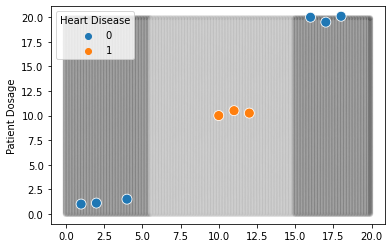

In [9]:
sns.scatterplot(y=XX[:,0], x=XX[:,1], hue=yy, palette = "gist_gray",  alpha = 0.3,sizes=[5,5],legend=False)
sns.scatterplot([1,2,4,10,11,12,16,17,18], data['Patient Dosage'], hue = data['Heart Disease'],  s = 100)
plt.show()

In [10]:
a,b,r,d, gamma = 1,10,1,2,-1

**Polynomial Kernel**

In [11]:
%%render

output  = (a*b+r)**2

<IPython.core.display.Latex object>

**Radical Kernel**

In [12]:
%%render

out = exp(gamma * (a-b)**2)

<IPython.core.display.Latex object>

In [13]:
a,b,r,d, gamma = 1,1.5,1,2,-0.5

In [14]:
%%render

out = exp(gamma * (a-b)**2)

<IPython.core.display.Latex object>

**When we plug values into the Radial Kernel**

**We get high deimension relationship**

**We get 0.779 is the high dimension relationship between those two observations are close to each other**

**We get 0 is the high dimension relationship between those two observations are very far to each other**

In [15]:
clf = SVC(kernel='rbf', gamma=0.5)
clf.fit(X, y)


SVC(gamma=0.5)

In [16]:
xx1,xx2 = np.meshgrid( np.arange(0, 20, 0.1),np.arange(0, 20, 0.1)) 

XX = np.vstack((xx1.ravel(), xx2.ravel())).T
yy = clf.predict(XX[:,1].reshape(-1, 1))


c:\users\tomzz\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


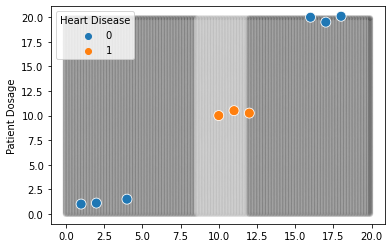

In [17]:
sns.scatterplot(y=XX[:,0], x=XX[:,1], hue=yy, palette = "gist_gray",  alpha = 0.3,sizes=[5,5],legend=False)
sns.scatterplot([1,2,4,10,11,12,16,17,18], data['Patient Dosage'], hue = data['Heart Disease'],  s = 100)
plt.show()

**Since we can expand this function into a Taylor Series**
**The value we get from radial Kernel is the relationship between two data points in infinite dimensions**